<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Guided-Capstone-Step-6.-Documentation" data-toc-modified-id="Guided-Capstone-Step-6.-Documentation-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Guided Capstone Step 6. Documentation</a></span><ul class="toc-item"><li><span><a href="#Fit-Models-with-Training-Dataset" data-toc-modified-id="Fit-Models-with-Training-Dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Fit Models with Training Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-0.1.0.1"><span class="toc-item-num">0.1.0.1&nbsp;&nbsp;</span>Best Model</a></span></li></ul></li></ul></li><li><span><a href="#Review-the-results" data-toc-modified-id="Review-the-results-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Review the results</a></span></li><li><span><a href="#Finalize-Code" data-toc-modified-id="Finalize-Code-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Finalize Code</a></span></li><li><span><a href="#Finalize-Documentation" data-toc-modified-id="Finalize-Documentation-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Finalize Documentation</a></span></li></ul></li></ul></div>

# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
df = pd.read_csv('data/step3_output.csv')

In [3]:
def eval_linear_model(df, target_feature, skip_features=None):    
    if skip_features is None:
        skip_features = []
        
    df = df.drop(skip_features, axis=1)
    
    X = df.drop(target_feature, axis=1)
    y = df[target_feature]

    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    y = y.ravel()

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    lm_evs = explained_variance_score(y_test, y_pred)
    lm_mas = mean_absolute_error(y_test, y_pred)
    
    print(f'The linear model explained variance score is: {lm_evs}')
    print(f'The linear model mean absolute error is: {lm_mas}')
    print(f'The linear model intercept is: {lm.intercept_}')
    
    coeff = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
    coeff = coeff.sort_values(by=['Coefficient'], ascending=False)
    
    return lm_evs, lm_mas, coeff, model   

In [4]:
lm3_evs, lm3_mas, coeff3, model = eval_linear_model(df,
                                             target_feature='AdultWeekend',
                                             skip_features=['Name', 'state', 'summit_elev'])

The linear model explained variance score is: 0.9357362015274017
The linear model mean absolute error is: 5.088638397897525
The linear model intercept is: 64.08036234346667


In [5]:
coeff3

,Coefficient
AdultWeekday,20.104048
clusters,2.633377
vertical_drop,1.948226
triple,1.369334
Runs,1.319585
surface,1.201067
daysOpenLastYear,1.170219
quad,1.141201
averageSnowfall,0.808173
fastQuads,0.669806


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [6]:
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [7]:
skip_features = ['Name', 'state', 'summit_elev']
target_feature = ['AdultWeekend']

to_drop = skip_features + target_feature

In [8]:
X = df.drop(to_drop, axis=1)
y = df[target_feature]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [9]:
X.iloc[151]

vertical_drop        2353.0
trams                   0.0
fastEight               0.0
fastSixes               0.0
fastQuads               3.0
quad                    2.0
triple                  6.0
double                  0.0
surface                 3.0
total_chairs           14.0
Runs                  105.0
TerrainParks            4.0
LongestRun_mi           3.3
SkiableTerrain_ac    3000.0
Snow Making_ac        600.0
daysOpenLastYear      123.0
yearsOpen              72.0
averageSnowfall       333.0
AdultWeekday           81.0
projectedDaysOpen     123.0
NightSkiing_ac        600.0
clusters                1.0
Name: 151, dtype: float64

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [10]:
x_big_mountain = X_scaled[151].reshape(1, -1)

In [11]:
y_pred_big_mountain = model.predict(x_big_mountain)

In [12]:
expected = round(y_pred_big_mountain.tolist().pop())

print(f'Expected Big Mountain Adult WeekEnd ticket price: ${expected}')

Expected Big Mountain Adult WeekEnd ticket price: $88


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [13]:
actual = round(df.loc[df['Name'].str.contains('Big Mountain'), 'AdultWeekend'].tolist().pop())

print(f'Actual Big Mountain Adult WeekEnd ticket price: ${actual}')

Actual Big Mountain Adult WeekEnd ticket price: $81


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [14]:
ac = df[df['Name'].str.contains('Big Mountain')]

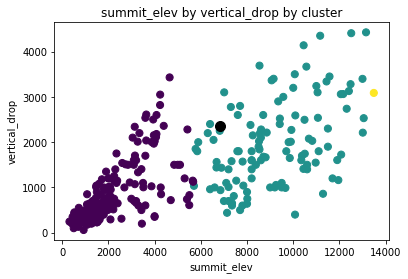

In [15]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

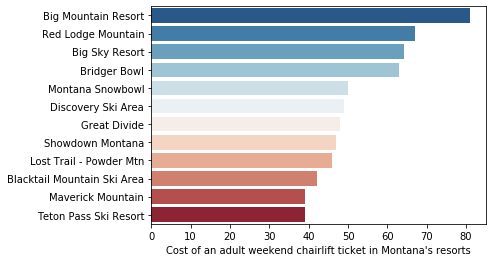

In [16]:
montana = df[df['state'].str.contains('Montana')].sort_values(by='AdultWeekend', ascending=False)
x = montana.AdultWeekend.tolist()
y = montana.Name.tolist()

sns.barplot(x=x, y=y, palette="RdBu_r")
plt.xlabel("Cost of an adult weekend chairlift ticket in Montana's resorts")
plt.savefig('figures/fig2.png',bbox_inches='tight')
plt.show()

In [17]:
montana_by_chairs = montana[['Name',
                             'SkiableTerrain_ac',
                             'vertical_drop',
                             'AdultWeekend',
                             'total_chairs',
                             'TerrainParks']].sort_values(by='total_chairs', ascending=False)

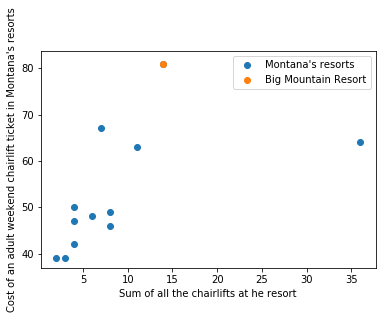

In [18]:
x = montana_by_chairs.total_chairs
y = montana_by_chairs.AdultWeekend

plt.scatter(x, y, label="Montana's resorts")
plt.scatter(ac.total_chairs, ac.AdultWeekend, label="Big Mountain Resort")

plt.ylabel("Cost of an adult weekend chairlift ticket in Montana's resorts")
plt.xlabel('Sum of all the chairlifts at he resort')

plt.legend()

plt.savefig('figures/fig3.png',bbox_inches='tight')
plt.show()

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [19]:
import pickle
from joblib import dump, load

s = pickle.dumps(model)

dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [24]:
lm3_evs, lm3_mas

(0.9357362015274017, 5.088638397897525)

In [28]:
data = {'Model': ['Model 3'],
        'Explained Variance': [lm3_evs],
        'Mean Absolute Error': [lm3_mas],
        'Features Dropped': ['base_elev, state, summit_elev']}

pd.DataFrame(data).set_index('Model').to_csv('models/model_performance.csv')

In [29]:
coeff3.to_csv('models/model_coefficients.csv')